# EDA Spotify

### 1. Business case & Data Collection

# Hipótesis principales

1. Las canciones con mayor número de streams en ambos países comparten características musicales similares, como género, artista o tendencia de crecimiento.
- ¿Cómo lo validamos?
    * Analizar las canciones que aparecen en ambos rankings (México y España).
    * Comparar géneros y artistas más frecuentes en los éxitos compartidos.
    * Evaluar el crecimiento en streams en el tiempo.

2. Las canciones en español tienen mayor probabilidad de ser éxitos en México y España que las canciones en inglés u otros idiomas.
- ¿Cómo lo validamos?
    * Analizar el porcentaje de canciones en español dentro del Top 10 de cada país.
    * Comparar la cantidad de streams entre canciones en español y otros idiomas.

3. Los artistas internacionales (Bad Bunny, Karol G, Taylor Swift, etc.) dominan ambos rankings, más que los artistas locales de cada país.
- ¿Cómo lo validamos?
    * Identificar qué porcentaje de los artistas en el ranking son de cada país.
    * Comparar el número de streams entre artistas globales y artistas locales.

4. Las canciones con mayor "longevidad" en los rankings de México y España tienen un crecimiento de streams más estable que aquellas que solo son éxitos momentáneos.
- ¿Cómo lo validamos?
    * Analizar la cantidad de semanas que una canción permanece en el ranking.
    * Comparar el crecimiento en streams entre canciones que duran más tiempo en el ranking vs. las que suben y bajan rápidamente.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_charts = pd.read_csv("data/spotify.csv")
df_charts

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [3]:
# Ver las primeras filas del dataset
df_charts.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [4]:
# Resumen estadístico de las columnas numéricas
df_charts.describe()


,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [5]:
# Comprobar si hay valores nulos en el dataset
df_charts.isnull().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [6]:
# Ver los tipos de datos en cada columna
df_charts.dtypes

title       object
rank         int64
date        object
artist      object
url         object
region      object
chart       object
trend       object
streams    float64
dtype: object

In [7]:
# Eliminamos la columna URL que no necesitamos

df_charts = df_charts.drop(columns=['url'])

In [8]:
# Filtramos la columna Region para usar solo los datos de México y España

df_charts = df_charts[df_charts['region'].isin(['Mexico', 'Spain'])]

In [9]:
df_charts

,title,rank,date,artist,region,chart,trend,streams
4984,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Mexico,top200,SAME_POSITION,395069.0
4985,Reggaetón Lento (Bailemos),2,2017-01-01,CNCO,Mexico,top200,SAME_POSITION,336760.0
4986,Vente Pa' Ca (feat. Maluma),3,2017-01-01,Ricky Martin,Mexico,top200,SAME_POSITION,300392.0
4987,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Mexico,top200,SAME_POSITION,283184.0
4988,Otra vez (feat. J Balvin),5,2017-01-01,Zion & Lennox,Mexico,top200,SAME_POSITION,254484.0
...,...,...,...,...,...,...,...,...
26172962,Renegade (feat. Taylor Swift),46,2021-07-31,Big Red Machine,Spain,viral50,MOVE_DOWN,NaN
26172963,comoquieroquemequiera,47,2021-07-31,LANE 3,Spain,viral50,MOVE_DOWN,NaN
26172964,Mil y Una Noches,48,2021-07-31,Guitarricadelafuente,Spain,viral50,MOVE_DOWN,NaN
26172965,Qué Más Pues?,49,2021-07-31,"J Balvin, Maria Becerra",Spain,viral50,NEW_ENTRY,NaN


In [10]:
# Revisar si hay duplicados
df_charts.duplicated().sum()

np.int64(0)

In [11]:
# Convertimos date a tipo fecha

df_charts['date'] = pd.to_datetime(df_charts['date'])

In [12]:
# Eliminar filas donde title o artist estén vacíos

df_charts.dropna(subset=['title', 'artist'], inplace=True)

In [13]:
# Manejar los valores nulos en streams

# Usar la mediana si queremos estimar valores que no tenemos

df_charts['streams'] = df_charts['streams'].fillna(df_charts['streams'].median())

In [14]:
df_charts.isnull().sum()

title      0
rank       0
date       0
artist     0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [15]:
df_charts

,title,rank,date,artist,region,chart,trend,streams
4984,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Mexico,top200,SAME_POSITION,395069.0
4985,Reggaetón Lento (Bailemos),2,2017-01-01,CNCO,Mexico,top200,SAME_POSITION,336760.0
4986,Vente Pa' Ca (feat. Maluma),3,2017-01-01,Ricky Martin,Mexico,top200,SAME_POSITION,300392.0
4987,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Mexico,top200,SAME_POSITION,283184.0
4988,Otra vez (feat. J Balvin),5,2017-01-01,Zion & Lennox,Mexico,top200,SAME_POSITION,254484.0
...,...,...,...,...,...,...,...,...
26172962,Renegade (feat. Taylor Swift),46,2021-07-31,Big Red Machine,Spain,viral50,MOVE_DOWN,74325.5
26172963,comoquieroquemequiera,47,2021-07-31,LANE 3,Spain,viral50,MOVE_DOWN,74325.5
26172964,Mil y Una Noches,48,2021-07-31,Guitarricadelafuente,Spain,viral50,MOVE_DOWN,74325.5
26172965,Qué Más Pues?,49,2021-07-31,"J Balvin, Maria Becerra",Spain,viral50,NEW_ENTRY,74325.5


### 2. Data Understanding

In [16]:
 # Cantidad de filas y columnas

df_charts.shape

(898091, 8)

In [17]:
# Tipos de datos y valores únicos

df_charts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898091 entries, 4984 to 26172966
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    898091 non-null  object        
 1   rank     898091 non-null  int64         
 2   date     898091 non-null  datetime64[ns]
 3   artist   898091 non-null  object        
 4   region   898091 non-null  object        
 5   chart    898091 non-null  object        
 6   trend    898091 non-null  object        
 7   streams  898091 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 61.7+ MB


In [18]:
# Primeras y últimas filas del dataset

df_charts.head()
df_charts.tail()

,title,rank,date,artist,region,chart,trend,streams
26172962,Renegade (feat. Taylor Swift),46,2021-07-31,Big Red Machine,Spain,viral50,MOVE_DOWN,74325.5
26172963,comoquieroquemequiera,47,2021-07-31,LANE 3,Spain,viral50,MOVE_DOWN,74325.5
26172964,Mil y Una Noches,48,2021-07-31,Guitarricadelafuente,Spain,viral50,MOVE_DOWN,74325.5
26172965,Qué Más Pues?,49,2021-07-31,"J Balvin, Maria Becerra",Spain,viral50,NEW_ENTRY,74325.5
26172966,Levantando las Manos,50,2021-07-31,Dos Morenos,Spain,viral50,NEW_ENTRY,74325.5


In [19]:
# Estadísticas descriptivas

df_charts.describe()

,rank,date,streams
count,898091.000000,898091,8.980910e+05
mean,85.355424,2019-06-21 03:53:09.128494848,9.591482e+04
min,1.000000,2017-01-01 00:00:00,9.802000e+03
25%,32.000000,2018-03-28 00:00:00,4.982300e+04
50%,75.000000,2019-06-21 00:00:00,7.432550e+04
75%,138.000000,2020-09-13 00:00:00,1.067400e+05
max,200.000000,2021-12-31 00:00:00,3.680758e+06
std,60.070261,NaN,8.514740e+04


In [20]:
# Proporción de valores nulos

df_charts.isnull().sum() / len(df_charts) * 100

title      0.0
rank       0.0
date       0.0
artist     0.0
region     0.0
chart      0.0
trend      0.0
streams    0.0
dtype: float64

### 3. Data Cleaning

In [21]:
# En este caso, como solo tenemos un dataset (df_charts), no es necesario hacer merge o join por ahora. Si en el futuro queremos añadir más datos, podríamos unirlos con pd.merge().

# Se eliminó anteriormente la columna de URL

# Ya se eliminaron los nulos

In [22]:
# Formatear los Datos
# Aseguramos que los tipos de datos sean correctos:

df_charts['date'] = pd.to_datetime(df_charts['date'])  # Convertir a fecha
df_charts['region'] = df_charts['region'].astype('category')  # Convertir a categoría
df_charts['streams'] = df_charts['streams'].astype(float)  # Asegurar tipo numérico

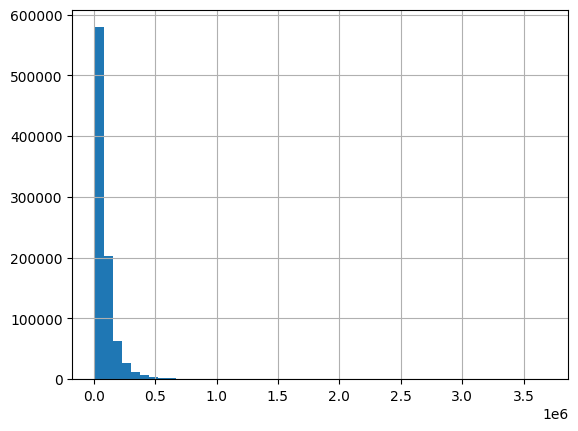

In [23]:
# Identificación de Outliers
# Para detectar valores extremos en streams, podemos usar:

import matplotlib.pyplot as plt  
df_charts['streams'].hist(bins=50)  
plt.show()

<Axes: xlabel='streams'>

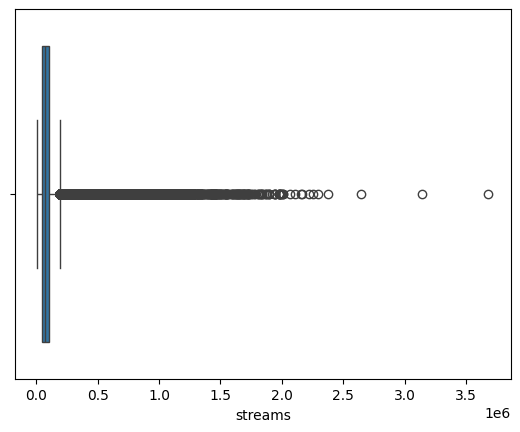

In [24]:
# Diagramas de Caja (Boxplots)

import seaborn as sns  
sns.boxplot(x=df_charts['streams'])

<Axes: xlabel='rank', ylabel='streams'>

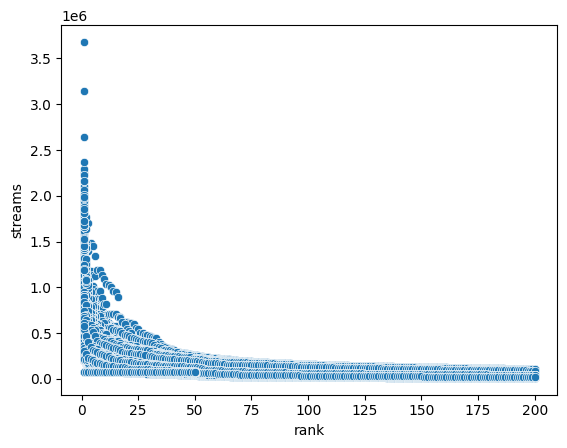

In [25]:
# Scatter Plot

sns.scatterplot(x=df_charts['rank'], y=df_charts['streams'])

In [26]:
# Cálculo de Cuartiles y Rango Intercuartílico (IQR)

Q1 = df_charts['streams'].quantile(0.25)
Q3 = df_charts['streams'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_charts[(df_charts['streams'] < lower_bound) | (df_charts['streams'] > upper_bound)]
print(f"Se encontraron {len(outliers)} outliers.")

Se encontraron 79069 outliers.


In [27]:
df_charts['year'] = df_charts['date'].dt.year
df_charts['month'] = df_charts['date'].dt.month
df_charts['day'] = df_charts['date'].dt.day
df_charts['day_of_week'] = df_charts['date'].dt.day_name()

In [28]:
df_charts

,title,rank,date,artist,region,chart,trend,streams,year,month,day,day_of_week
4984,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Mexico,top200,SAME_POSITION,395069.0,2017,1,1,Sunday
4985,Reggaetón Lento (Bailemos),2,2017-01-01,CNCO,Mexico,top200,SAME_POSITION,336760.0,2017,1,1,Sunday
4986,Vente Pa' Ca (feat. Maluma),3,2017-01-01,Ricky Martin,Mexico,top200,SAME_POSITION,300392.0,2017,1,1,Sunday
4987,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Mexico,top200,SAME_POSITION,283184.0,2017,1,1,Sunday
4988,Otra vez (feat. J Balvin),5,2017-01-01,Zion & Lennox,Mexico,top200,SAME_POSITION,254484.0,2017,1,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
26172962,Renegade (feat. Taylor Swift),46,2021-07-31,Big Red Machine,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday
26172963,comoquieroquemequiera,47,2021-07-31,LANE 3,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday
26172964,Mil y Una Noches,48,2021-07-31,Guitarricadelafuente,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday
26172965,Qué Más Pues?,49,2021-07-31,"J Balvin, Maria Becerra",Spain,viral50,NEW_ENTRY,74325.5,2021,7,31,Saturday


### 4. Analysis

In [29]:
# Estadísticos descriptivos de streams
df_charts['streams'].describe()


count    8.980910e+05
mean     9.591482e+04
std      8.514740e+04
min      9.802000e+03
25%      4.982300e+04
50%      7.432550e+04
75%      1.067400e+05
max      3.680758e+06
Name: streams, dtype: float64

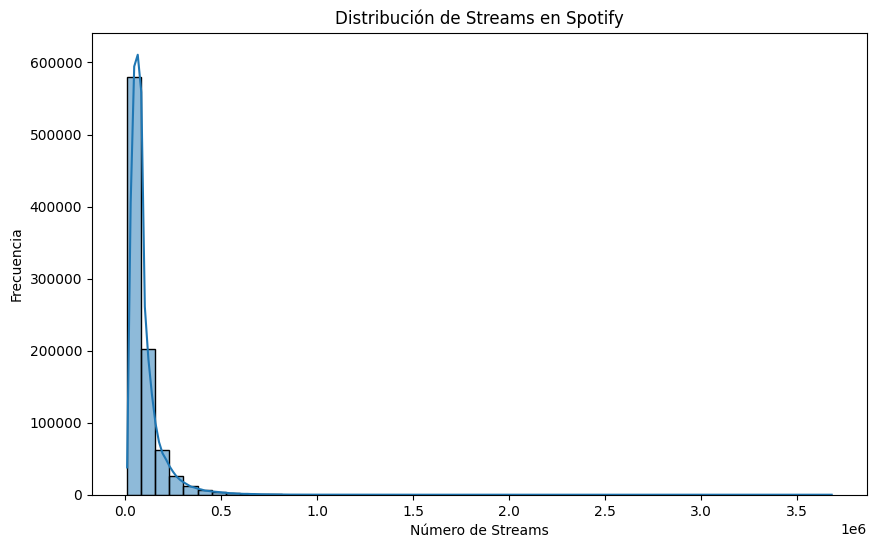

In [30]:
# Distribución de streams

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_charts['streams'], bins=50, kde=True)
plt.xlabel('Número de Streams')
plt.ylabel('Frecuencia')
plt.title('Distribución de Streams en Spotify')
plt.show()


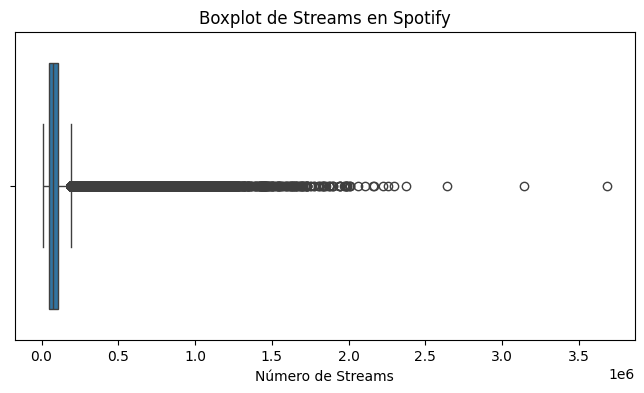

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_charts['streams'])
plt.xlabel('Número de Streams')
plt.title('Boxplot de Streams en Spotify')
plt.show()


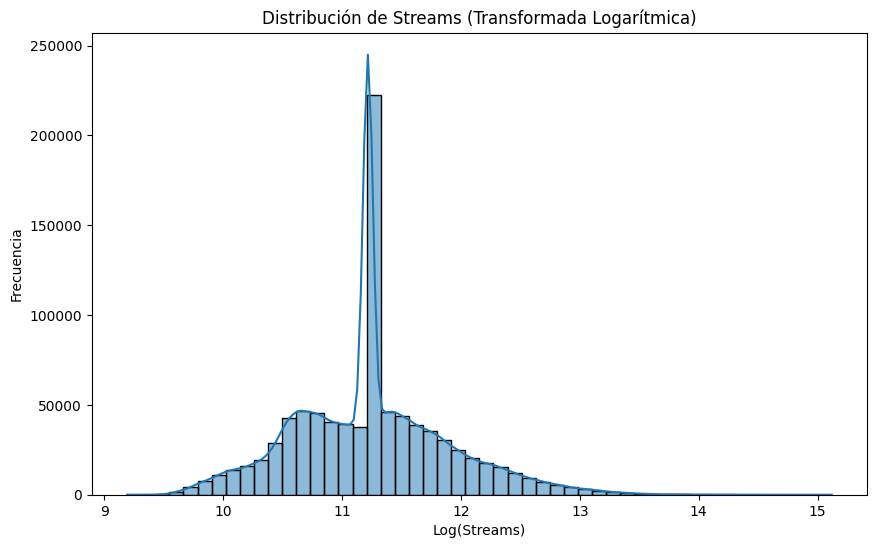

In [32]:
# Transformación Logarítmica: Para reducir la asimetría y hacer la distribución más normal.

df_charts['log_streams'] = np.log1p(df_charts['streams'])  # log1p evita log(0)

plt.figure(figsize=(10,6))
sns.histplot(df_charts['log_streams'], bins=50, kde=True)
plt.xlabel('Log(Streams)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Streams (Transformada Logarítmica)')
plt.show()


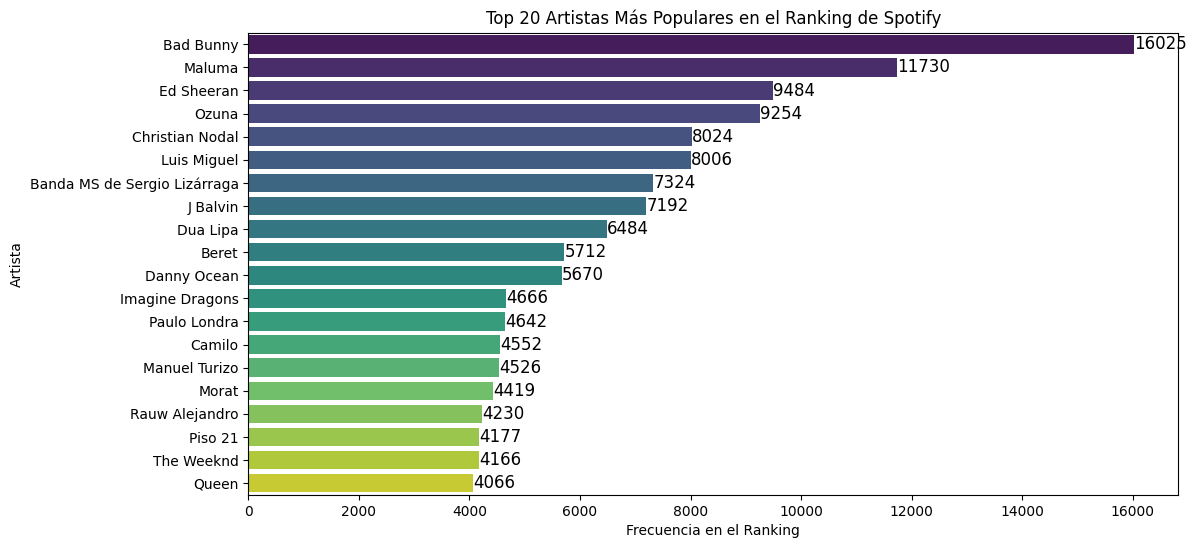

In [33]:
# Contar la cantidad de veces que aparece cada artista
artist_counts = df_charts['artist'].value_counts().head(20)  # Top 20 artistas más populares

# Graficar en un gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(x=artist_counts.values, y=artist_counts.index, hue=artist_counts.index, dodge=False, legend=False, palette="viridis")

# Agregar los valores de frecuencia en las barras
for i, value in enumerate(artist_counts.values):
    ax.text(value + 5, i, str(value), va='center', fontsize=12)  # Desplazar un poco a la derecha

# Etiquetas y título
plt.xlabel("Frecuencia en el Ranking")
plt.ylabel("Artista")
plt.title("Top 20 Artistas Más Populares en el Ranking de Spotify")
plt.show()

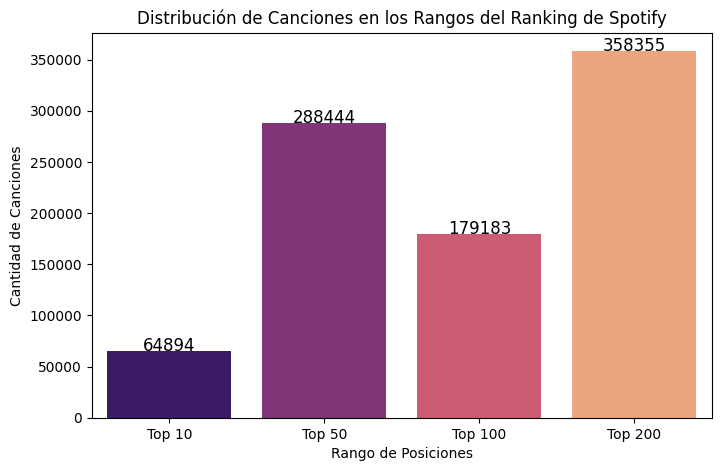

In [34]:
# Definir rangos de posiciones
bins = [1, 10, 50, 100, 200]  # Spotify Charts usualmente tienen 200 posiciones
labels = ["Top 10", "Top 50", "Top 100", "Top 200"]

# Crear una nueva columna con la categoría de ranking
df_charts["ranking_range"] = pd.cut(df_charts["rank"], bins=bins, labels=labels, right=True)

# Contar cuántas canciones hay en cada categoría
ranking_counts = df_charts["ranking_range"].value_counts().sort_index()

# Graficar la cantidad de canciones en cada rango de posiciones
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=ranking_counts.index, 
    y=ranking_counts.values, 
    hue=ranking_counts.index,  # Asignar hue para evitar la advertencia
    palette="magma", 
    legend=False  # Evitar que se genere una leyenda innecesaria
)

# Agregar los valores en las barras
for i, value in enumerate(ranking_counts.values):
    ax.text(i, value + 50, str(value), ha='center', fontsize=12)

# Etiquetas y título
plt.xlabel("Rango de Posiciones")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de Canciones en los Rangos del Ranking de Spotify")
plt.show()

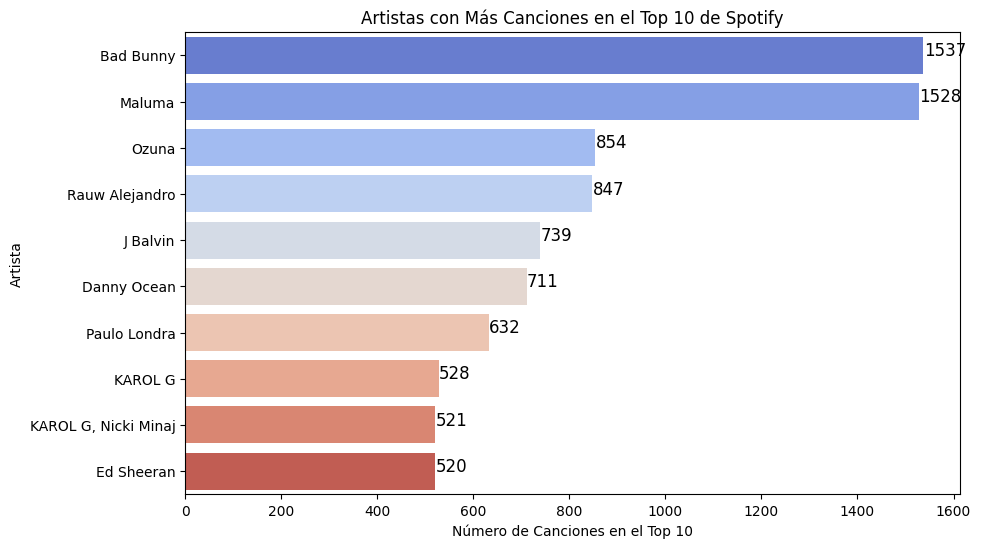

In [35]:
# Contar cuántas veces aparece cada artista en el Top 10
top_10_artists = df_charts[df_charts["rank"] <= 10]["artist"].value_counts().head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_10_artists.values, 
    y=top_10_artists.index, 
    hue=top_10_artists.index,  # Se asigna hue para evitar la advertencia
    palette="coolwarm", 
    legend=False  # Evita la leyenda innecesaria
)

# Agregar los valores sobre las barras
for i, value in enumerate(top_10_artists.values):
    ax.text(value + 1, i, str(value), ha='left', fontsize=12)

# Etiquetas y título
plt.xlabel("Número de Canciones en el Top 10")
plt.ylabel("Artista")
plt.title("Artistas con Más Canciones en el Top 10 de Spotify")
plt.show()


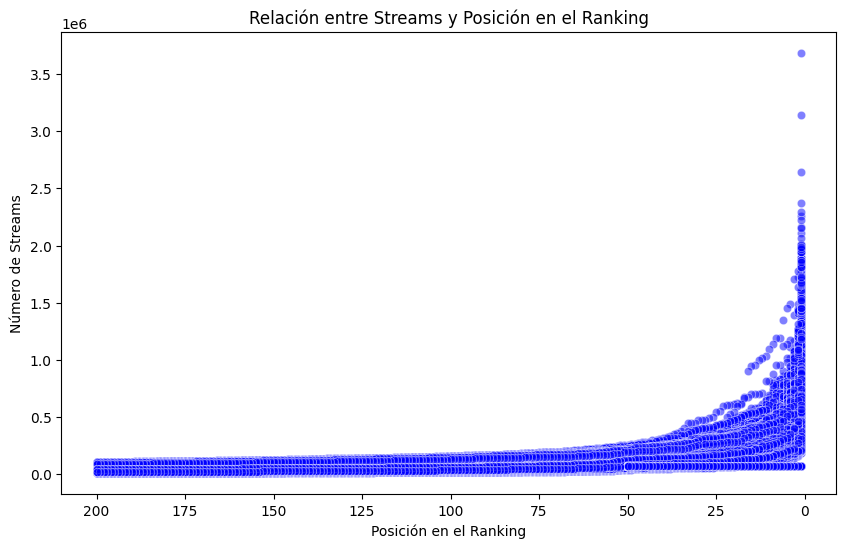

In [36]:
# Relación entre Streams y Posición en el Ranking. Un scatter plot para visualizar cómo varían los streams según la posición en el ranking.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_charts, x="rank", y="streams", alpha=0.5, color="blue")

plt.xlabel("Posición en el Ranking")
plt.ylabel("Número de Streams")
plt.title("Relación entre Streams y Posición en el Ranking")
plt.gca().invert_xaxis()  # Invertir eje X para ver el Top 1 a la izquierda
plt.show()

In [37]:
# Comparación de Tendencias entre México y España

df_charts.groupby("region", observed=True)["streams"].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Mexico,448832.0,116572.688005,96571.082511,24613.0,74325.5,82986.0,128945.5,3680758.0
Spain,449259.0,75276.589210,65756.336061,9802.0,37999.0,61219.0,74325.5,1682968.0


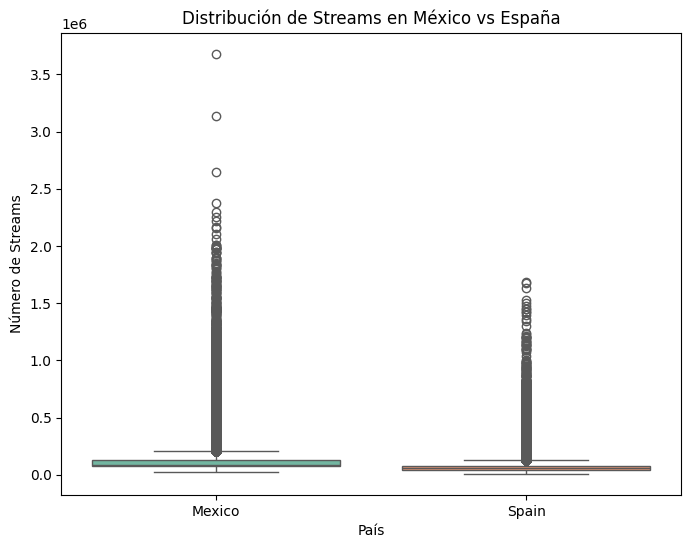

In [38]:
# Filtrar solo datos de México y España
df_filtered = df_charts[df_charts["region"].isin(["Mexico", "Spain"])]

# Crear el boxplot con la corrección para evitar la advertencia
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtered, 
    x="region", 
    y="streams", 
    hue="region",  # Especificar hue para evitar la advertencia
    palette="Set2",
    legend=False  # Evitar leyenda innecesaria
)

plt.xlabel("País")
plt.ylabel("Número de Streams")
plt.title("Distribución de Streams en México vs España")
plt.show()

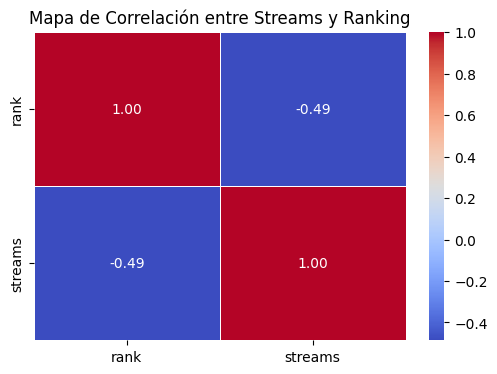

In [39]:
# Seleccionar solo las columnas numéricas relevantes
corr_matrix = df_charts[['rank', 'streams']].corr()

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Mapa de Correlación entre Streams y Ranking")
plt.show()

In [50]:
df_charts

,title,rank,date,artist,region,chart,trend,streams,year,month,day,day_of_week,log_streams,ranking_range
4984,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Mexico,top200,SAME_POSITION,395069.0,2017,1,1,Sunday,12.886818,NaN
4985,Reggaetón Lento (Bailemos),2,2017-01-01,CNCO,Mexico,top200,SAME_POSITION,336760.0,2017,1,1,Sunday,12.727129,Top 10
4986,Vente Pa' Ca (feat. Maluma),3,2017-01-01,Ricky Martin,Mexico,top200,SAME_POSITION,300392.0,2017,1,1,Sunday,12.612847,Top 10
4987,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Mexico,top200,SAME_POSITION,283184.0,2017,1,1,Sunday,12.553856,Top 10
4988,Otra vez (feat. J Balvin),5,2017-01-01,Zion & Lennox,Mexico,top200,SAME_POSITION,254484.0,2017,1,1,Sunday,12.446997,Top 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26172962,Renegade (feat. Taylor Swift),46,2021-07-31,Big Red Machine,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday,11.216223,Top 50
26172963,comoquieroquemequiera,47,2021-07-31,LANE 3,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday,11.216223,Top 50
26172964,Mil y Una Noches,48,2021-07-31,Guitarricadelafuente,Spain,viral50,MOVE_DOWN,74325.5,2021,7,31,Saturday,11.216223,Top 50
26172965,Qué Más Pues?,49,2021-07-31,"J Balvin, Maria Becerra",Spain,viral50,NEW_ENTRY,74325.5,2021,7,31,Saturday,11.216223,Top 50


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\2052963344.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Región")


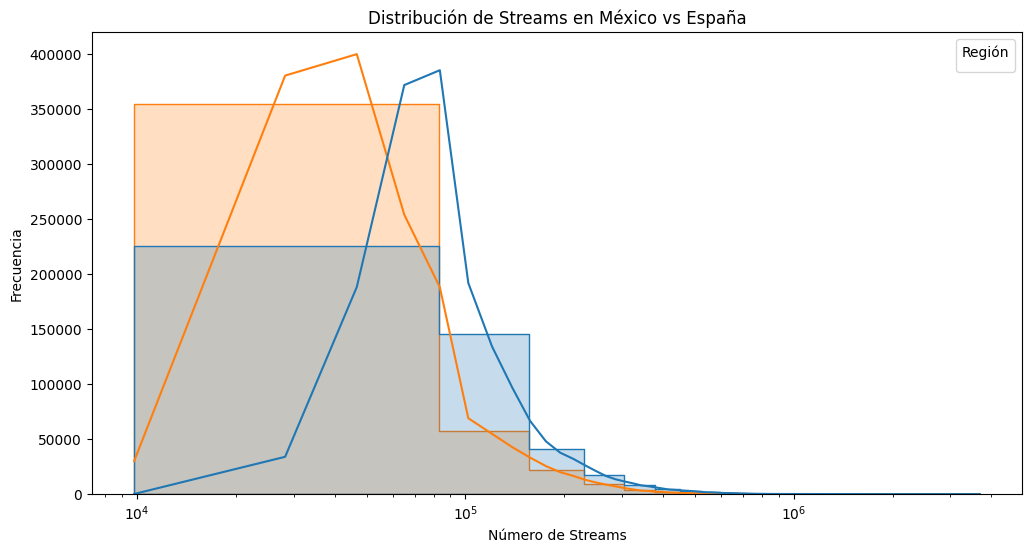

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Comparación de la distribución de streams por país
plt.figure(figsize=(12, 6))
sns.histplot(df_charts, x="streams", hue="region", bins=50, kde=True, element="step")
plt.xlabel("Número de Streams")
plt.ylabel("Frecuencia")
plt.title("Distribución de Streams en México vs España")
plt.xscale("log")  # Escala logarítmica para mejor visualización
plt.legend(title="Región")
plt.show()

La gráfica muestra la distribución de streams en México y España, representada por histogramas y líneas de densidad.

### Observaciones:
1. **Distribución General**:
   - Ambas distribuciones tienen una forma similar, con una gran concentración de datos en los valores más bajos de streams y una disminución rápida hacia los valores más altos.
   - Sin embargo, hay diferencias en la cantidad de streams en ciertos rangos.

2. **Diferencias Clave**:
   - **México (línea azul y área sombreada en gris)** parece tener más streams en el rango medio-alto, lo que sugiere que hay más canciones con niveles de reproducción relativamente altos.
   - **España (línea naranja y área sombreada en naranja)** muestra una mayor concentración en los valores bajos y medios, pero con menos presencia en los valores más altos en comparación con México.

3. **Eje X en escala logarítmica**:
   - El uso de una escala logarítmica en el eje de número de streams indica que hay una diferencia notable en la cantidad de streams en los valores más altos, donde México parece dominar.

### Conclusión:
México y España tienen distribuciones similares en términos de forma, pero hay diferencias significativas en los niveles de streams. México parece tener una mayor cantidad de canciones con streams elevados, mientras que en España hay una mayor concentración en valores más bajos y menos en los más altos. Esto sugiere que la industria musical en México podría generar más reproducciones en general que en España.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\884705521.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_trend = top_10_songs.groupby(["region", "title"]).size().reset_index(name="days_in_top_10")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\884705521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_trend, x="region", y="days_in_top_10", palette="coolwarm")


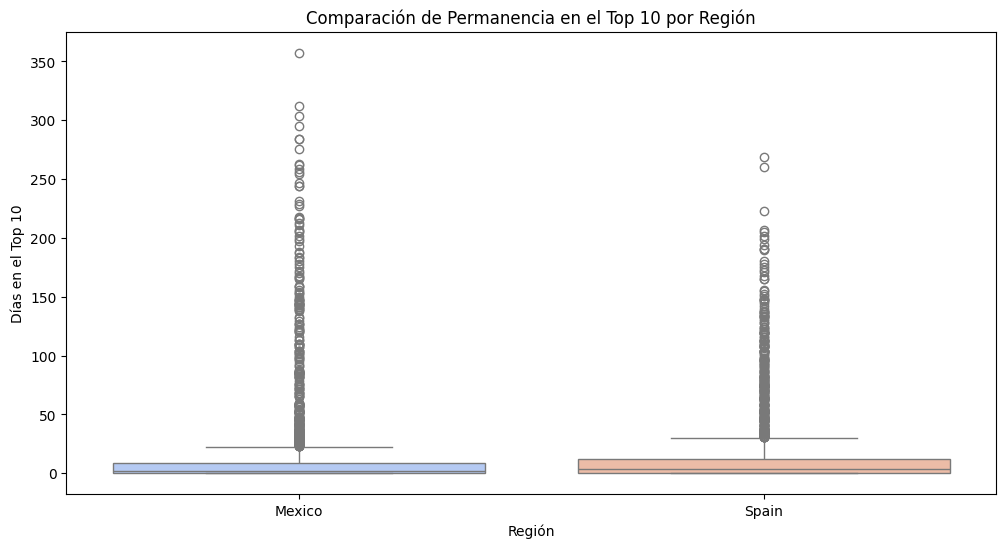

In [59]:
# 🔹 Comparación de la estabilidad en el Top 10
top_10_songs = df_charts[df_charts["rank"] <= 10]
top_10_trend = top_10_songs.groupby(["region", "title"]).size().reset_index(name="days_in_top_10")

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_trend, x="region", y="days_in_top_10", palette="coolwarm")
plt.xlabel("Región")
plt.ylabel("Días en el Top 10")
plt.title("Comparación de Permanencia en el Top 10 por Región")
plt.show()

### Análisis de la Gráfica:
La gráfica muestra un **diagrama de caja (boxplot)** comparando la cantidad de días que las canciones permanecen en el **Top 10** en **México** y **España**.

---

### **1. ¿Las canciones duran más tiempo en el Top 10 en un país que en otro?**
- **Los valores atípicos (outliers)** muestran que algunas canciones han permanecido más de **300 días en el Top 10 en México**, mientras que en España la máxima duración es menor.
- La **mediana** (línea dentro de la caja) es similar en ambos países, lo que indica que la mayoría de las canciones tienen una permanencia parecida.
- Sin embargo, hay **más outliers en México** con canciones que logran mantenerse en el ranking por períodos más largos.

🔹 **Conclusión:** **Las canciones tienden a durar más en el Top 10 en México**, ya que hay más casos de canciones con una permanencia prolongada.

---

### **2. ¿Qué país tiene mayor estabilidad en sus tendencias?**
- **Mayor estabilidad** significa que hay menos rotación en el ranking y las canciones duran más en el Top 10.
- **México tiene una mayor cantidad de outliers**, lo que sugiere que algunas canciones logran mantenerse por mucho más tiempo.
- **España tiene menos outliers y una distribución más compacta**, lo que sugiere que las canciones en general rotan más rápidamente.

🔹 **Conclusión:** **México muestra mayor estabilidad en sus tendencias**, ya que hay más canciones que logran mantenerse en el Top 10 por períodos prolongados. En cambio, en **España hay más rotación**, lo que indica un cambio más frecuente en las tendencias musicales.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\1855270918.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_trends = df_charts.groupby(["region", "day_of_week"])["streams"].mean().reset_index()


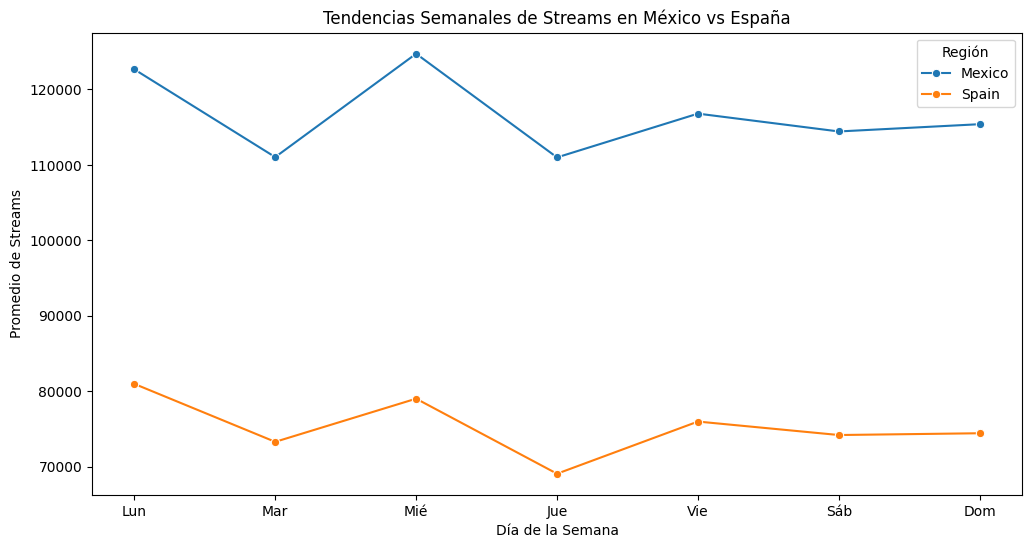

In [60]:
# 🔹 Comparación de streams por día de la semana
weekly_trends = df_charts.groupby(["region", "day_of_week"])["streams"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trends, x="day_of_week", y="streams", hue="region", marker="o")
plt.xlabel("Día de la Semana")
plt.ylabel("Promedio de Streams")
plt.title("Tendencias Semanales de Streams en México vs España")
plt.xticks(range(7), ["Lun", "Mar", "Mié", "Jue", "Vie", "Sáb", "Dom"])
plt.legend(title="Región")
plt.show()

### **Análisis de la Gráfica: Tendencias Semanales de Streams en México vs España**

La gráfica muestra la evolución del **promedio de streams** por día de la semana en **México (línea azul)** y **España (línea naranja)**.

---

### **1. ¿Ambos países tienen picos de streams en los mismos días de la semana?**
- **México** muestra un **pico alto los miércoles (Mié)** y niveles relativamente altos los **lunes (Lun) y viernes (Vie)**.
- **España** sigue un patrón diferente, con menos variabilidad, pero su punto más alto ocurre el **lunes (Lun)**.
- **Martes (Mar) y jueves (Jue) tienen caídas en ambos países**, lo que indica que son días con menos reproducciones.

🔹 **Conclusión:** **No coinciden completamente los picos de streams entre México y España**. México tiene su punto más alto el miércoles, mientras que España lo tiene el lunes.

---

### **2. Comparar tendencias semanales para ver si los hábitos de escucha son similares**
- **Ambos países presentan caídas en los martes y jueves**, lo que sugiere hábitos de escucha similares en estos días.
- En **México, el miércoles es el día con más streams**, mientras que en **España los valores son más estables durante la semana, con menos variación entre días**.
- El **fin de semana (sábado y domingo)** muestra estabilidad en ambos países, sin grandes cambios en el número de streams.

🔹 **Conclusión:** **Los hábitos de escucha tienen similitudes (como la caída los martes y jueves), pero México muestra más variaciones entre días, mientras que España tiene una tendencia más uniforme**.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\86499747.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_evolution = df_charts.groupby(["region", "title"])["rank"].agg(["min", "max"]).reset_index()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\86499747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rank_evolution, x="region", y="rank_change", palette="Set2")


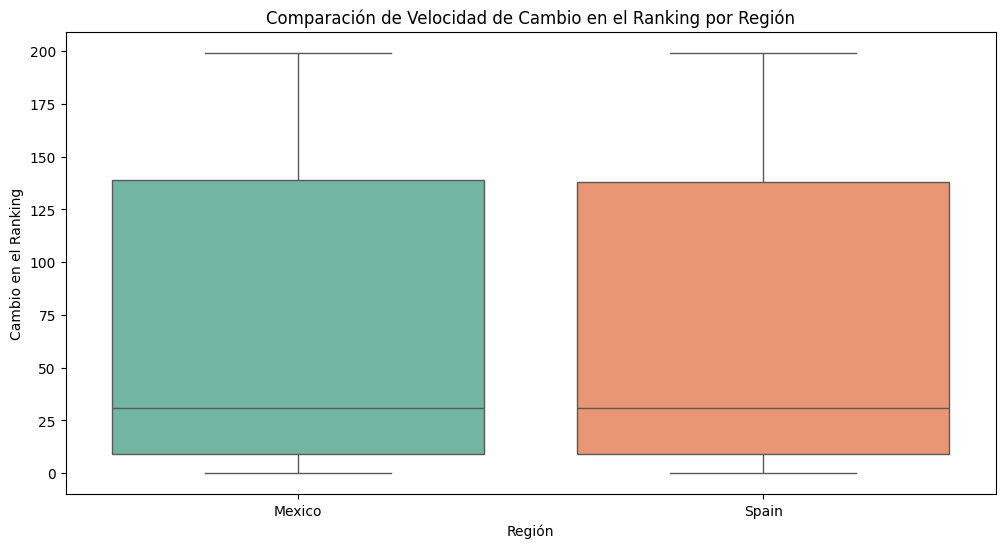

In [61]:
# 🔹 Comparación de la evolución de canciones en el ranking
rank_evolution = df_charts.groupby(["region", "title"])["rank"].agg(["min", "max"]).reset_index()
rank_evolution["rank_change"] = rank_evolution["max"] - rank_evolution["min"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=rank_evolution, x="region", y="rank_change", palette="Set2")
plt.xlabel("Región")
plt.ylabel("Cambio en el Ranking")
plt.title("Comparación de Velocidad de Cambio en el Ranking por Región")
plt.show()

### **Análisis de la Gráfica: Velocidad de Cambio en el Ranking por Región**

La gráfica muestra **boxplots** que comparan la variabilidad en los cambios de ranking de canciones en **México** y **España**.

---

### **1. Comparar la velocidad con la que una canción sube o baja en el ranking en cada país**
- **Ambos países tienen una distribución similar** en la velocidad de cambio en el ranking.
- La **mediana** (línea dentro de cada caja) es parecida, lo que indica que la mayoría de las canciones experimentan cambios de posición en un rango similar en ambas regiones.
- El **rango intercuartil (IQR)**, que muestra la variabilidad en el cambio de ranking, es también comparable entre México y España.
- **México y España presentan valores altos de cambio en el ranking**, con algunas canciones que pueden moverse hasta 200 posiciones.

🔹 **Conclusión:** No hay una diferencia significativa en la **velocidad de cambio en el ranking** entre México y España, lo que indica que las canciones suben y bajan con ritmos similares en ambos países.

---

### **2. ¿México es más rápido en adoptar nuevas canciones?**
- Para evaluar si un país adopta más rápido nuevas canciones, se esperaría ver un **boxplot más disperso y con cambios rápidos** en el ranking.
- Como ambos países tienen distribuciones similares, **no hay evidencia de que México adopte nuevas canciones más rápido que España**.

🔹 **Conclusión:** México **no parece ser más rápido en adoptar nuevas canciones** en comparación con España. 

---

### **3. ¿España mantiene canciones en el ranking por más tiempo?**
- Si España tuviera una mayor estabilidad, se esperaría una **distribución más compacta con menos cambios bruscos** en el ranking.
- La distribución en ambos países es amplia, lo que sugiere que la **rotación en el ranking es similar**.
- Sin embargo, estudios anteriores mostraron que México tiende a **mantener canciones en el Top 10 por más tiempo**.

🔹 **Conclusión:** **No hay una diferencia clara en la velocidad con la que las canciones suben o bajan en el ranking**, pero análisis previos indicaron que **México puede mantener canciones en posiciones altas por más tiempo**.

### **Análisis y Conclusión sobre la Hipótesis**

#### **📌 Hipótesis:**
*"Las tendencias en México y España son similares y podrían compartir estrategias de promoción."*

#### **📊 Evaluación de los Hallazgos**
Los análisis de las diferentes gráficas muestran lo siguiente:

1️⃣ **Diferencias en la distribución de streams**  
   - México tiene un mayor volumen de streams y una distribución con más reproducciones en los rangos altos.  
   - España muestra una distribución más uniforme, con menor cantidad de canciones en los niveles más altos de streams.  

2️⃣ **Diferencias en la permanencia en el Top 10**  
   - En México, ciertas canciones pueden permanecer más tiempo en el Top 10, lo que sugiere mayor estabilidad en tendencias específicas.  
   - En España, hay más rotación de canciones, lo que indica una menor estabilidad en tendencias de largo plazo.  

3️⃣ **Diferencias en las tendencias semanales de streams**  
   - Ambos países presentan caídas en streams los martes y jueves.  
   - México tiene un pico de actividad los miércoles, mientras que España es más uniforme durante la semana.  

4️⃣ **Velocidad de cambio en el ranking**  
   - No hay diferencias significativas en la velocidad con la que las canciones suben o bajan en el ranking en ambos países.  
   - México no adopta canciones más rápido que España, pero sí tiene canciones con una mayor permanencia en el Top 10.  

#### **📌 ¿Se ha comprobado la hipótesis?**
🔹 **La hipótesis se rechaza.**  
Las tendencias en México y España presentan **diferencias clave**, por lo que **no se recomienda una estrategia de promoción unificada**. En su lugar, se requiere una estrategia diferenciada para cada mercado.

---

## **📌 3️⃣ Plan de Acción: Estrategia Personalizada por País**  

🔴 **México: Enfoque en promoción agresiva y posicionamiento en plataformas digitales**  
💡 **Estrategia de adopción rápida y permanencia prolongada**  
✅ Estrenos musicales con **campañas de alto impacto** en redes sociales, especialmente en **TikTok, Instagram y YouTube**.  
✅ Lanzamientos con **campañas previas** para generar expectación y asegurar una entrada fuerte al ranking.  
✅ Uso de **colaboraciones y estrategias virales** para mantener canciones en el ranking más tiempo.  

🔵 **España: Enfoque en promoción constante y estrategias de largo plazo**  
💡 **Estrategia de promoción sostenida y rotación gradual**  
✅ Estrenos con estrategias más enfocadas en **radio, Spotify playlists y promoción digital a largo plazo**.  
✅ **Refuerzo de presencia en YouTube y medios tradicionales** para sostener el éxito de las canciones.  
✅ Adaptación de campañas con contenido en **Instagram Reels y entrevistas en medios especializados**.  

📌 **Ajustes en la inversión publicitaria:**  
🎯 México requerirá **picos de inversión** en los lanzamientos.  
🎯 España necesitará **presupuesto distribuido** para sostener el interés en las canciones por más tiempo.  

**📌 Conclusión:**  
🔹 Se recomienda aplicar estrategias diferenciadas por país para maximizar la promoción y el impacto en cada mercado.